In [75]:
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sys.path.append('../')
from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.utils.flow import NFlow
import numpy as np

In [61]:
channels = ['CE', 'CHE', 'GC', 'NSC', 'SMT']
file_path='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
params =['mchirp', 'q','chieff', 'z']

model_names, flow = read_models.get_models(file_path, channels, params, use_flows=True, no_bins=[5,4,4,5,4])

100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


CE (0, 0)
mean combined weights
1e-06
max combined weights
1.3503584210190315e-05
sum cosmoweights
1.0
effective sample size
0.24802561194417763

CE (0, 1)
mean combined weights
9.999999999999997e-07
max combined weights
1.6792402754066837e-05
sum cosmoweights
0.9999999999999997
effective sample size
0.2067593580392073

CE (0, 2)
mean combined weights
1e-06
max combined weights
3.072624050094293e-05
sum cosmoweights
1.0
effective sample size
0.1494435621171337

CE (0, 3)
mean combined weights
1.0000000000000004e-06
max combined weights
5.4644919164365274e-05
sum cosmoweights
1.0000000000000004
effective sample size
0.11239350144155626

CE (0, 4)
mean combined weights
9.999999999999995e-07
max combined weights
0.00010049401414343813
sum cosmoweights
0.9999999999999996
effective sample size
0.09369984211254967

CE (1, 0)
mean combined weights
1.0000000000000008e-06
max combined weights
1.3516289699885855e-05
sum cosmoweights
1.0000000000000009
effective sample size
0.24758247800110497

C

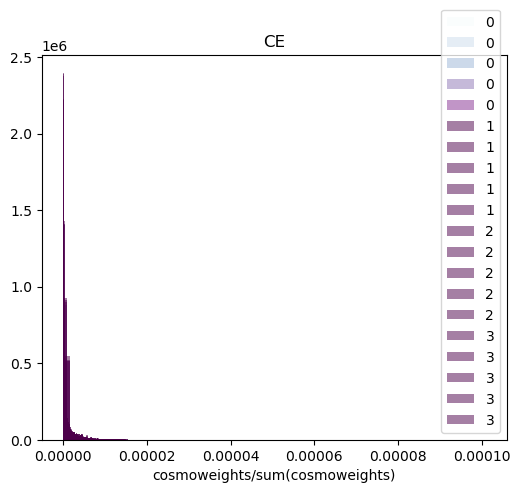

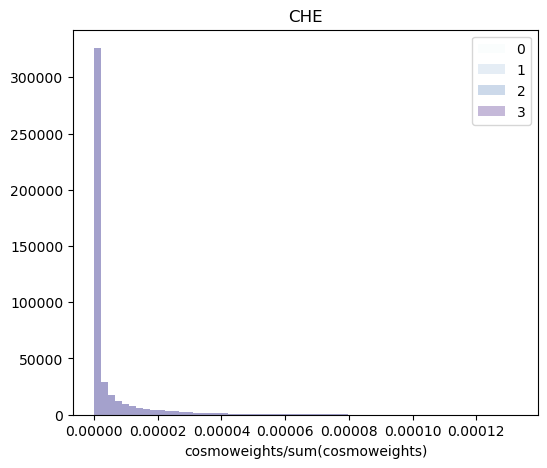

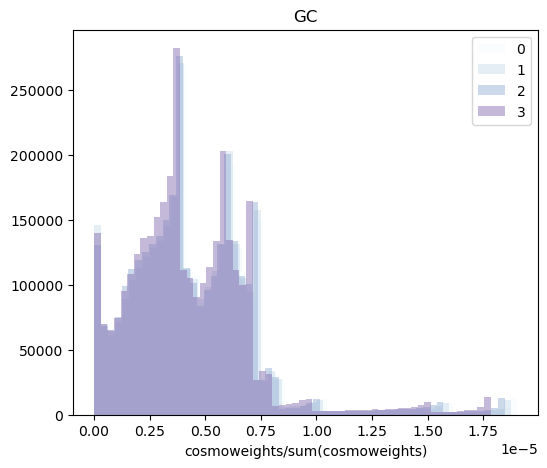

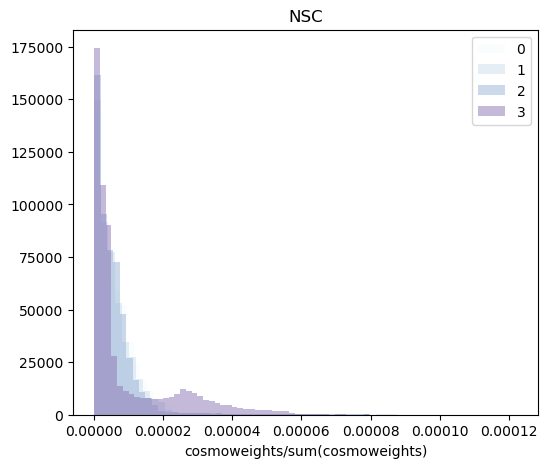

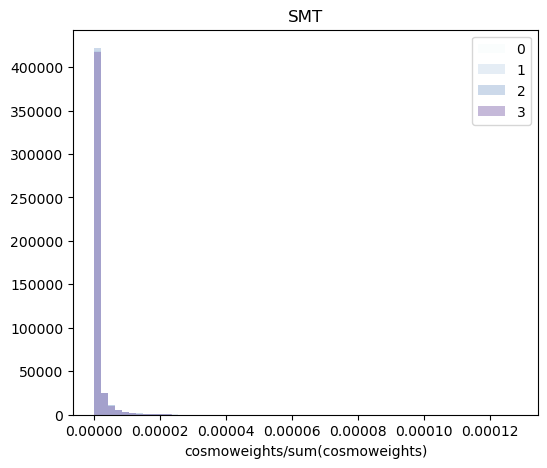

In [102]:
for chnl in channels:
    plt.rcParams["figure.figsize"] = (6,5)
    fig, ax = plt.subplots(1,1)
    for i, (smdl, smdl_weights) in enumerate(flow[chnl].combined_weights.items()):
        print(chnl, smdl)
        print('mean combined weights')
        print(np.mean(smdl_weights))
        print('max combined weights')
        print(np.max(smdl_weights))
        print('sum cosmoweights')
        print(np.sum(flow[chnl].cosmo_weights[smdl]))
        print('effective sample size')
        print((np.sum(smdl_weights)**2)/np.sum(smdl_weights**2)/len(smdl_weights))
        print()
        ax.hist(smdl_weights, bins=60, density=True, color=cm.BuPu(i*0.2), alpha=0.5, label=smdl)
        ax.set_xlabel('cosmoweights/sum(cosmoweights)')
        ax.set_title(chnl)
        ax.legend()


(array([9.16722e+05, 4.49470e+04, 1.70970e+04, 8.68200e+03, 4.54000e+03,
        3.14000e+03, 1.58600e+03, 1.22200e+03, 5.86000e+02, 4.11000e+02,
        2.46000e+02, 1.99000e+02, 1.31000e+02, 9.90000e+01, 9.70000e+01,
        6.80000e+01, 4.80000e+01, 4.50000e+01, 3.80000e+01, 2.20000e+01,
        3.10000e+01, 1.10000e+01, 1.20000e+01, 5.00000e+00, 4.00000e+00,
        6.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 3.34980047e-06, 6.69960094e-06, 1.00494014e-05,
        1.33992019e-05, 1.67490024e-05, 2.00988028e-05, 2.34486033e-05,
        2.67984038e-05, 3.01482042e-05, 3.34980047e-05, 3.68478052e-05,
        4.01976057e-05, 4.35474061e-05, 4.68972066e-05, 5.02470071e-05,
        5.35968075e-05, 5.69466080e-05, 6.02964085e-05, 6.36462090e-05,
        6.69960094e-05, 7.03458099e-05, 7.36956104e-05, 7.70454108e-05,
        8.03952113e-05, 8.37450118e-05, 8.70948123e-05, 9.04446127e-05,
        9.37944132e-05, 9.71442137e-05, 1.00494014e-04])

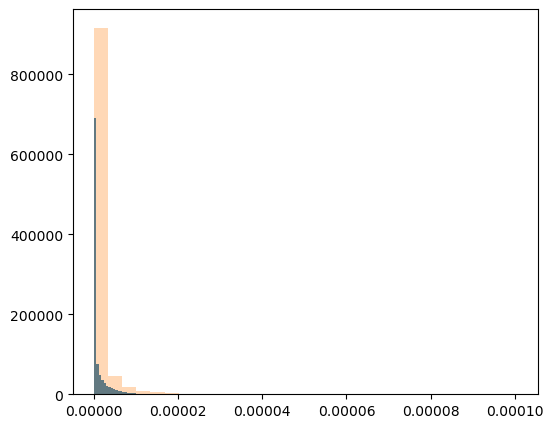

In [90]:
plt.hist(flow['CE'].combined_weights[(0,1)], bins=30)
plt.hist(flow['CE'].combined_weights[(0,4)], bins=30, alpha=0.3)

In [67]:
flow[chnl].combined_weights

{(0,
  0): array([1.83787378e-06, 2.49933350e-07, 4.24028269e-07, ...,
        1.21389441e-07, 0.00000000e+00, 2.47292265e-06]),
 (0,
  1): array([2.29280824e-10, 2.20985001e-13, 8.28648801e-08, ...,
        1.87974940e-07, 1.07939874e-06, 2.84557555e-06]),
 (0,
  2): array([1.54655316e-08, 1.08695754e-07, 4.17502011e-08, ...,
        5.20551719e-09, 6.92300257e-09, 2.83189453e-06]),
 (0,
  3): array([5.79718617e-08, 1.21464895e-09, 3.20667132e-06, ...,
        5.71686522e-10, 2.94416140e-08, 2.29055380e-07]),
 (0,
  4): array([6.09957323e-08, 2.17375756e-10, 1.21711117e-05, ...,
        9.38381352e-08, 2.31030501e-06, 2.86855473e-07]),
 (1,
  0): array([3.39817603e-08, 3.14740375e-08, 1.55491144e-10, ...,
        5.97923229e-10, 2.73868069e-06, 6.77299819e-08]),
 (1,
  1): array([5.08857462e-08, 5.35494644e-09, 1.03488692e-07, ...,
        9.31876142e-07, 1.53871743e-06, 1.75432269e-06]),
 (1,
  2): array([1.30371821e-09, 6.08759413e-07, 7.80302096e-08, ...,
        1.67033817e-10, 2.

(array([8.89188e+05, 5.29090e+04, 2.24770e+04, 1.17280e+04, 7.03000e+03,
        4.52000e+03, 3.01000e+03, 2.01600e+03, 1.37300e+03, 9.91000e+02,
        7.04000e+02, 5.06000e+02, 4.45000e+02, 3.63000e+02, 2.99000e+02,
        2.22000e+02, 2.02000e+02, 1.75000e+02, 1.60000e+02, 1.44000e+02,
        1.14000e+02, 1.04000e+02, 1.08000e+02, 1.17000e+02, 9.70000e+01,
        9.80000e+01, 6.00000e+01, 6.20000e+01, 5.60000e+01, 4.70000e+01,
        5.20000e+01, 5.10000e+01, 4.30000e+01, 4.40000e+01, 3.70000e+01,
        4.30000e+01, 3.40000e+01, 2.50000e+01, 3.50000e+01, 3.60000e+01,
        2.90000e+01, 2.20000e+01, 2.40000e+01, 1.50000e+01, 1.50000e+01,
        2.50000e+01, 1.20000e+01, 1.40000e+01, 1.40000e+01, 1.80000e+01,
        1.40000e+01, 1.60000e+01, 9.00000e+00, 1.00000e+01, 1.00000e+01,
        1.20000e+01, 9.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 2.12185095e-06, 4.24370191e-06, 6.36555286e-06,
        8.48740382e-06, 1.06092548e-05, 1.27311057

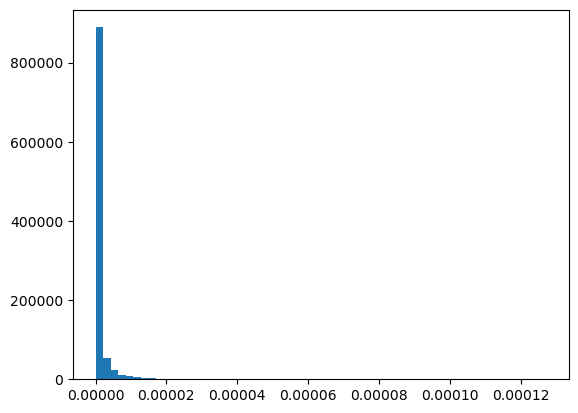

In [16]:
plt.hist(flow['SMT'].combined_weights[0], bins=60)

In [17]:
np.mean(flow['SMT'].combined_weights[0])

9.999999999999995e-07

In [18]:
np.mean(flow['SMT'].cosmo_weights[0])

9.999999999999995e-07

In [20]:
np.max(flow['SMT'].cosmo_weights[0])

0.00012731105725186678

In [19]:
np.sum(flow['SMT'].cosmo_weights[0])

0.9999999999999994

In [51]:
batch_size=10000
random_samples = np.random.choice(np.shape(flow['SMT'].combined_weights[3])[0],size=(int(batch_size)))
batch_weights = flow['SMT'].combined_weights[0][random_samples]

In [50]:
flow['SMT'].cosmo_weights[0].shape

(1000000,)

In [49]:
batch_weights.shape

(10000,)

In [55]:
np.mean(batch_weights)

9.88575304243591e-07

In [53]:
np.max(batch_weights)

0.0001161604812198815

(array([8.801e+03, 5.500e+02, 2.540e+02, 1.370e+02, 7.300e+01, 4.500e+01,
        3.100e+01, 2.000e+01, 1.900e+01, 1.700e+01, 4.000e+00, 1.000e+01,
        6.000e+00, 1.000e+00, 7.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 1.93600802e-06, 3.87201604e-06, 5.80802406e-06,
        7.74403208e-06, 9.68004010e-06, 1.16160481e-05, 1.35520561e-05,
        1.54880642e-05, 1.74240722e-05, 1.93600802e-05, 2.12960882e-05,
        2.32320962e-05, 2.51681043e-05, 2.

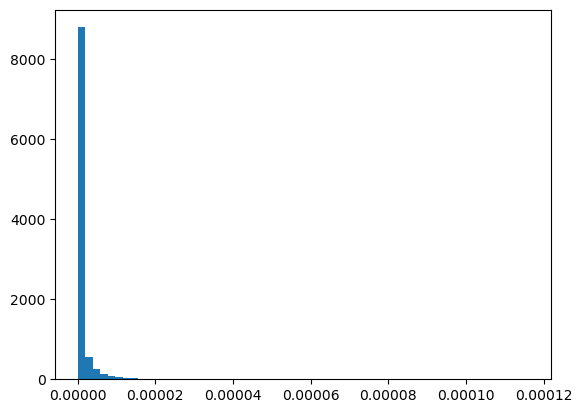

In [54]:
plt.hist(batch_weights, bins=60)